<div style="display: flex; text-align:center; background-color:  #4d5af3 ;" >
<h1 style="margin: auto; padding: 30px; ">Projet 01 - Analyser les données FIFA 19<br>
</h1>
</div>


#####  Auteur : Abdelmajid EL HOU - Data Analyst - abdelmajid.elhou@gmail.com

<div style="border-style: double;border-width: 5px;border-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">Ce programme est divisé en 4 parties.</h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
        <lu>
            <li>Partie 1 : Le projet </li>
            <li>Partie 2 : Librairies et fonctions</li>
            <li>Partie 3 : Exploration & visualisation des données</li>
            <li>Partie 4 : Visualisation avancée des donnéess</li>
        </lu>
    </div>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Le projet</h2>
</div>

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. Announced on 6 June 2018 for its E3 2018 press conference, it was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.It is the 26th installment in the FIFA series. As with FIFA 18, Cristiano Ronaldo initially as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released, featuring Neymar, Kevin De Bruyne and Paulo Dybala.

The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League. Martin Tyler and Alan Smith return as regular commentators, while the new commentary team of Derek Rae and Lee Dixon feature in the UEFA competitions mode.Composer Hans Zimmer and rapper Vince Staples recorded a new remix of the UEFA Champions League anthem specifically for the game. The character Alex Hunter, who first appeared in FIFA 17 returns for the third and final installment of "The Journey", entitled, "The Journey: Champions".In June 2019, a free update added the FIFA Women's World Cup as a separate game mode.

This is the last game in the FIFA series to be available on a seventh-generation console, and the last known game to be available for the PlayStation 3 worldwide.

Inspired from: https://www.kaggle.com/roshansharma/fifa-data-visualization

<p><b>The idea of this project is to explor the FIFA dataset and doing some visualisations</b></p>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Librairies et fonctions</h2>
</div>

In [158]:
# importer les librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# Créer le dossier RES (résultats) s'il n'existe pas
import os

path = 'RES'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory (RES) if not exist 
  os.makedirs(path)
  print("The new directory is created!")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Exploration & visualisation des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1. - Importer & Nettoyer les données</h3>
</div>

In [160]:
# importer le fichier csv: https://www.kaggle.com/karangadiya/fifa19?select=data.csv
# https://www.kaggle.com/roshansharma/fifa-data-visualization
df =pd.read_csv('data/fifa.csv')

In [161]:
# afficher l'entete du tableau
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [162]:
# Résumé des données
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [163]:
# Vérifier les données manquantes
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [164]:
df['FKAccuracy'].head()

0    94.0
1    76.0
2    87.0
3    19.0
4    83.0
Name: FKAccuracy, dtype: float64

In [165]:
# Nettoyage des données: remplacer les valeurs maquantes par la moyenne de la population
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.2. - Nombre de joueurs par pays</h3>
</div>

In [166]:
# Nombre de joueurs par pays
df['Nationality'].value_counts().head()

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

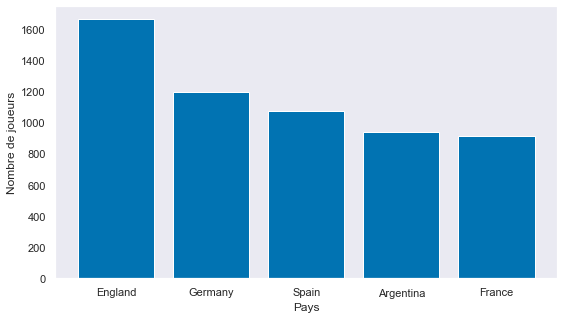

In [167]:
# Top 5 des pays en nombre de joueurs
top5 = list(df['Nationality'].value_counts().head().keys())

# nombre de joueurs pour chaque pays (top5)
top5_values = list(df['Nationality'].value_counts().head())

# Représentation graphique (sauvegarder les plots)
plt.figure(figsize=(9,5))
#plt.grid(b=None)
plt.bar(top5, top5_values)
plt.xlabel('Pays')
plt.ylabel('Nombre de joueurs')
plt.savefig('RES/top_5_pays_nombre_joueurs.png', dpi = 199) # save plots 
plt.show()

L'England est le pays avec le plus de joueurs, suivi par l'Allemagne et l'espagne.

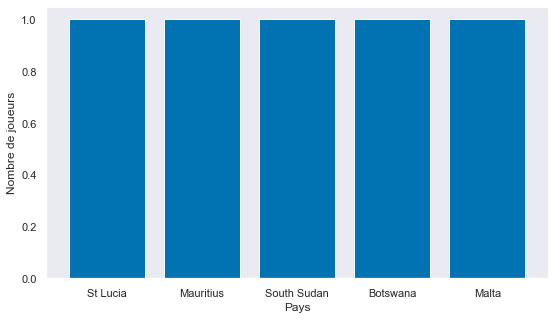

In [168]:
# Les 5 pays avec le moin de joueurs
lowest5 = list(df['Nationality'].value_counts().tail().keys())

# nombre de joueurs pour chaque pays (top5)
lowest5_values = list(df['Nationality'].value_counts().tail())

# Représentation graphique (sauvegarder les plots)
plt.figure(figsize=(9,5))
#plt.grid(b=None)
plt.bar(lowest5, lowest5_values)
plt.xlabel('Pays')
plt.ylabel('Nombre de joueurs')
plt.savefig('RES/lowest_5_pays_nombre_joueurs.png', dpi = 199) # save plots 
plt.show()

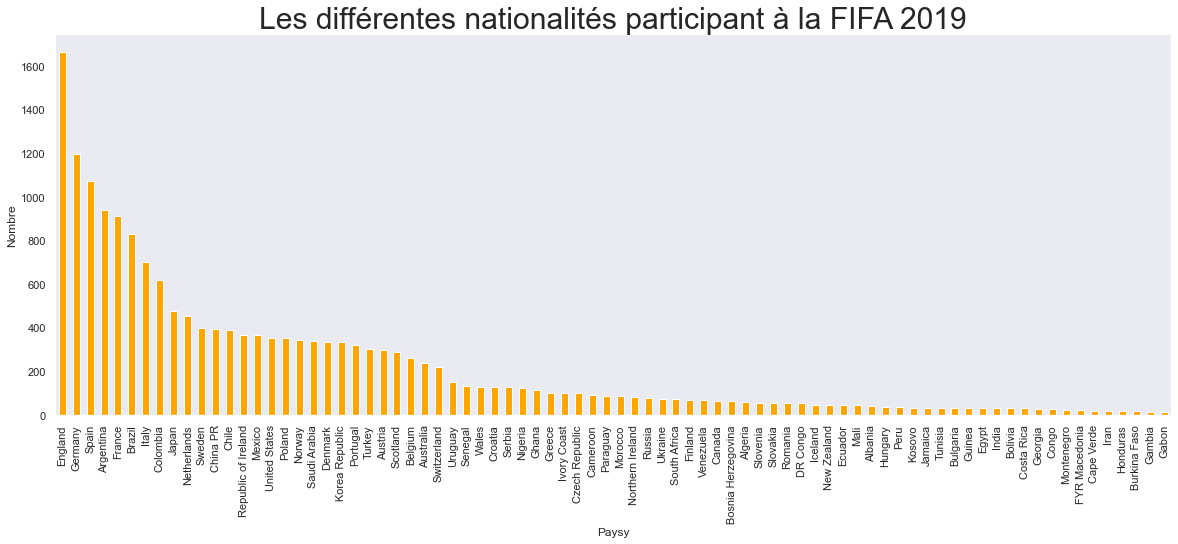

In [169]:
# Les différentes nationalités participant à la FIFA 2019

#plt.style.use('dark_background')
df['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Les différentes nationalités participant à la FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Paysy')
plt.ylabel('Nombre')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3. - Nombre de buts par joueur</h3>
</div>

In [170]:
# Top 5 des joueurs et leurs Nationalité et club
df[['Name', 'Nationality', 'Club', 'Overall']].sort_values(by='Overall', ascending=False).head()

,Name,Nationality,Club,Overall
0,L. Messi,Argentina,FC Barcelona,94
1,Cristiano Ronaldo,Portugal,Juventus,94
2,Neymar Jr,Brazil,Paris Saint-Germain,92
3,De Gea,Spain,Manchester United,91
4,K. De Bruyne,Belgium,Manchester City,91


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.4. - Salaire des joueur</h3>
</div>

In [171]:
# Adapter la colonne salaire 'Wage': remplacer les symboles euro et k
df.Wage = df.Wage.str.replace('€', '')
df.Wage = df.Wage.str.replace('K', '').astype('float')

In [172]:
# Joueurs avec le salaire le plus haut (en milliers d'euro)
df[['Name', 'Wage']].sort_values(by='Wage', ascending=False).head()

,Name,Wage
0,L. Messi,565.0
7,L. Suárez,455.0
6,L. Modrić,420.0
1,Cristiano Ronaldo,405.0
8,Sergio Ramos,380.0


C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


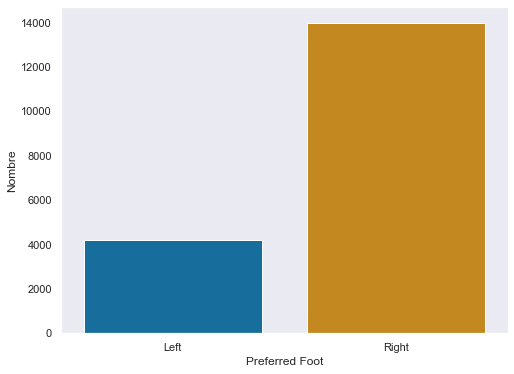

In [173]:
# Preffered foot
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'])
plt.xlabel('Preferred Foot')
plt.ylabel('Nombre')
plt.savefig('RES/coté_preferé_des_joueurs.png', dpi = 199) # save plots 
plt.show()

La majorité des joueurs prèfèrent jouer à droite. 

La majorité des joueurs prèfèrent jouer la droite. 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.5. - Âge des joueur</h3>
</div>

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


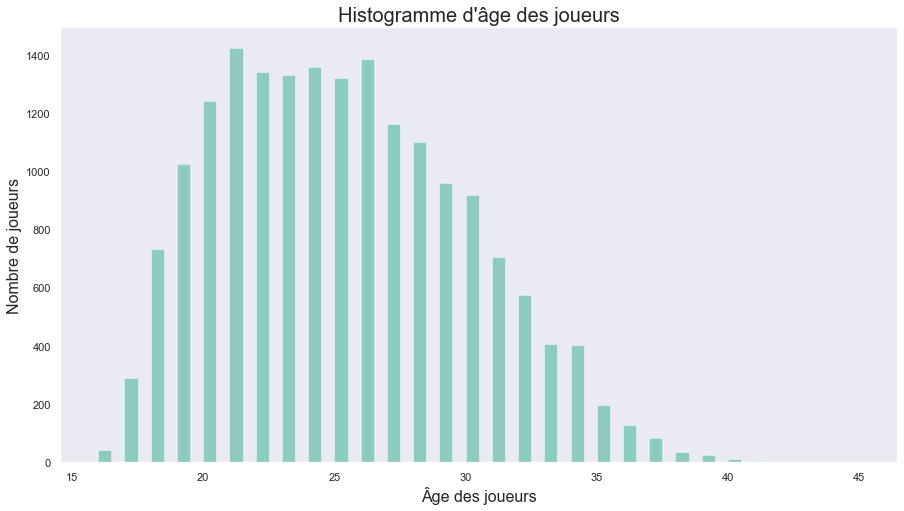

In [174]:
# Histogramme: La distribution d'âge 
sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = df.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Âge des joueurs", fontsize = 16)
ax.set_ylabel(ylabel = 'Nombre de joueurs', fontsize = 16)
ax.set_title(label = "Histogramme d'âge des joueurs", fontsize = 20)
plt.savefig('RES/histogram_age_joueurs.png', dpi = 199)
plt.show()

In [175]:
# Liste des joueurs les plus jeunes
age_min = df['Age'].min()
df[(df.Age==age_min)][['Name', 'Age']]

,Name,Age
11457,W. Geubbels,16
11732,A. Taoui,16
12496,Pelayo Morilla,16
12828,Guerrero,16
13293,H. Massengo,16
13567,Y. Verschaeren,16
15363,Y. Roemer,16
15746,Y. Begraoui,16
15793,J. Lahne,16
16081,J. Italiano,16


In [176]:
# Liste des joueurs les plus agés
age_max = df['Age'].max()
df[(df.Age==age_max)][['Name', 'Age']]

,Name,Age
4741,O. Pérez,45


O. Pérez agé de 45 ans est le joueur le plus agé.

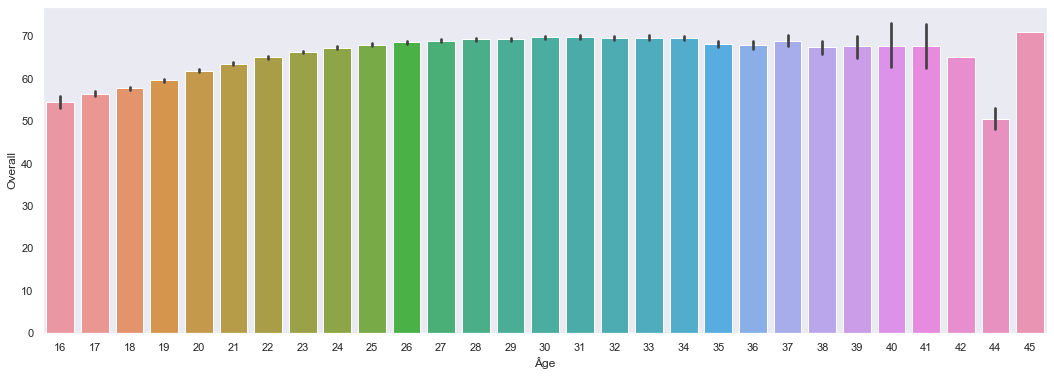

In [177]:
# Age vs rating
plt.figure(figsize=(18,6))
sns.barplot(x='Age', y='Overall', data=df)
plt.xlabel('Âge')
plt.ylabel('Overall')
plt.savefig('RES/overall_par_age.png', dpi = 199) # save plots 
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.6. - Taille vs note (overall) des joueur</h3>
</div>

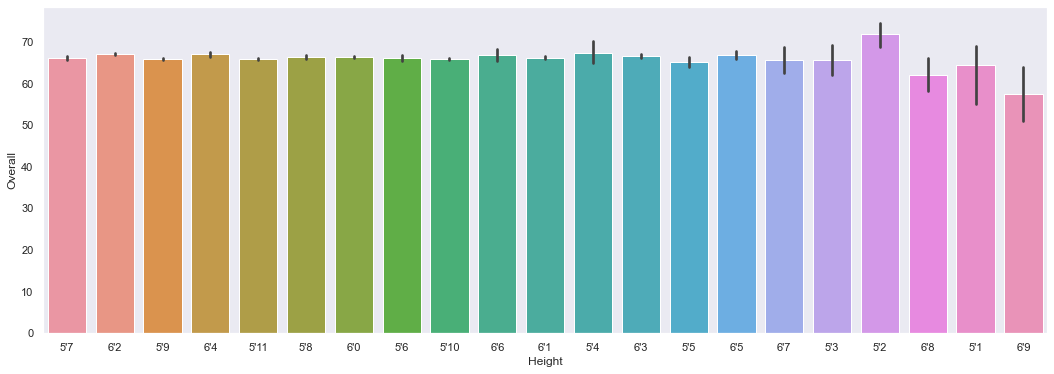

In [178]:
# Age vs rating
plt.figure(figsize=(18,6))
sns.barplot(x='Height', y='Overall', data=df)
plt.xlabel('Height')
plt.ylabel('Overall')
plt.savefig('RES/overall_par_Height.png', dpi = 199) # save plots 
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.7. -  Meilleurs shot Power</h3>
</div>

In [179]:
# Les 5 meilleurs puissance de tir (ShotPower)
df[['Name', 'ShotPower']].sort_values(by='ShotPower', ascending=False).head()

,Name,ShotPower
1,Cristiano Ronaldo,95.0
378,Hulk,94.0
1348,F. Guarín,93.0
890,L. Podolski,92.0
36,G. Bale,92.0


In [180]:
# Les 5 Long shot players
df[['Name', 'LongShots']].sort_values(by='LongShots', ascending=False).head()

,Name,LongShots
0,L. Messi,94.0
1,Cristiano Ronaldo,93.0
32,Coutinho,93.0
11,T. Kroos,92.0
28,J. Rodríguez,92.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.8. -  Meilleurs pénalties</h3>
</div>

In [181]:
# Top 5 pénalties (joueurs)
df[['Name', 'Penalties']].sort_values(by='Penalties', ascending=False).head()

,Name,Penalties
206,M. Balotelli,92.0
118,Fabinho,91.0
16,H. Kane,90.0
297,M. Kruse,90.0
945,L. Baines,90.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.9. -  Nombre de joueurs sur la base de leurs mouvements de compétences.</h3>
</div>

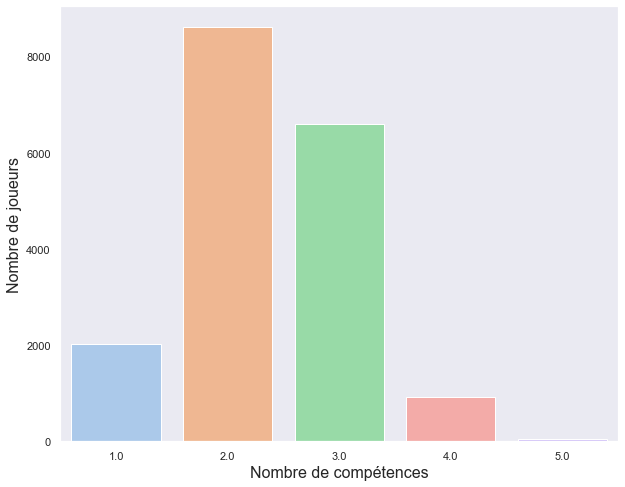

In [182]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
#ax.set_title(label = ' Nombre de joueurs sur la base de leurs mouvements de compétences', fontsize = 20)
ax.set_xlabel(xlabel = 'Nombre de compétences', fontsize = 16)
ax.set_ylabel(ylabel = 'Nombre de joueurs', fontsize = 16)
plt.savefig('RES/mouvement_de_competences.png', dpi = 199)
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 4 - Visualisation avancée des données</h2>
</div>

In [183]:
# Choisir certaines variables importantes
important_var = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(df, columns = important_var)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.1. -  Comparaison des scores globaux et de l'âge par rapport au pied préféré.</h3>
</div>

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


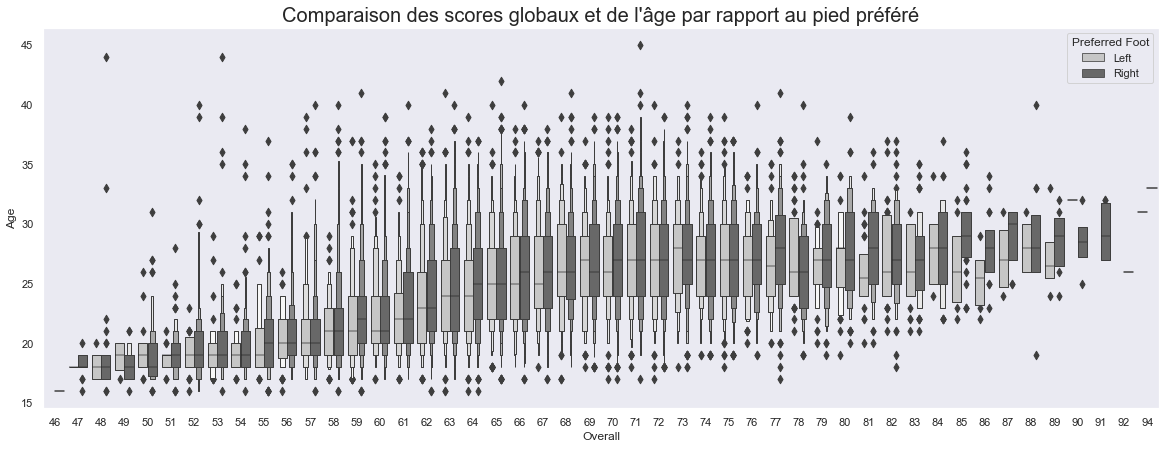

In [184]:
# Overall score et l'âge des joueurs - Faire un violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'Greys')
plt.title("Comparaison des scores globaux et de l'âge par rapport au pied préféré", fontsize = 20)
plt.savefig("RES/violin_plot.png", dpi=199)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">4.2. -  Heatmap corrélations entre variables.</h3>
</div>

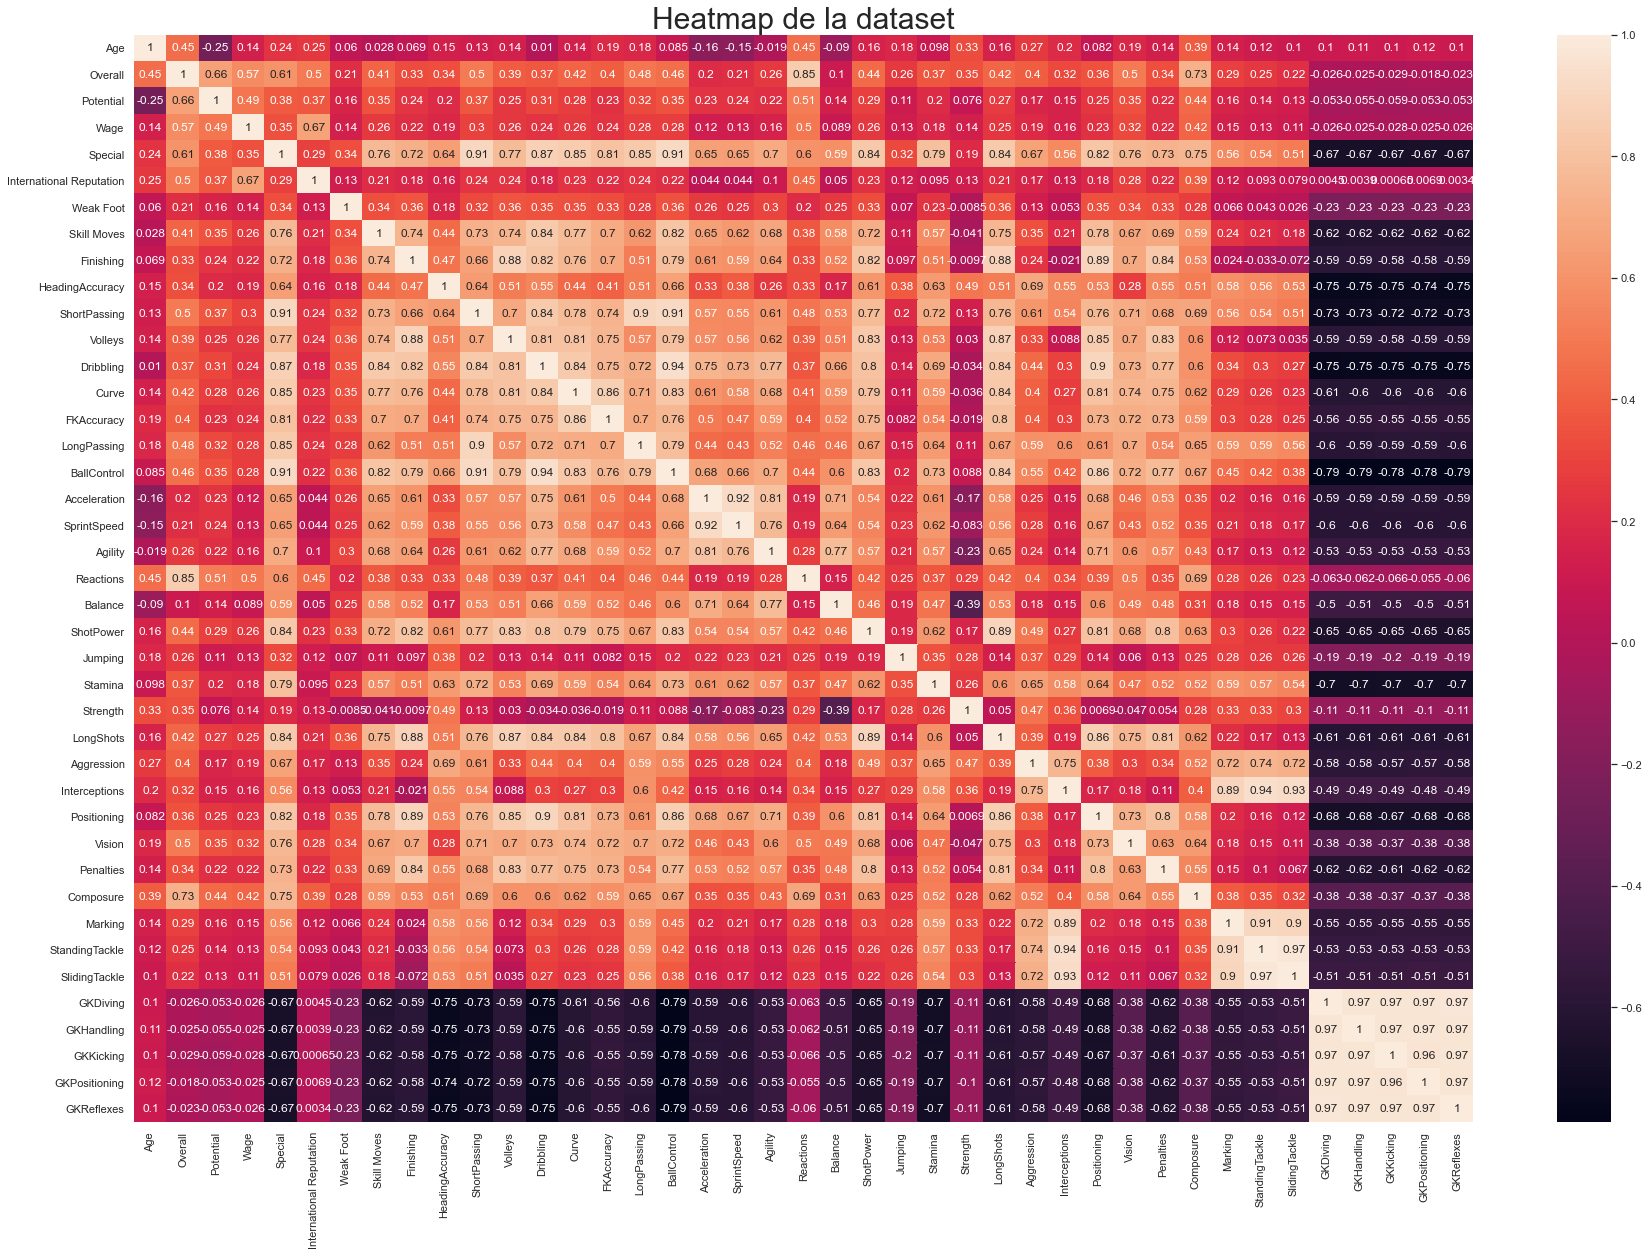

In [185]:
# Afficher les heatmap des corréations entre variables

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Heatmap de la dataset', fontsize = 30)
plt.savefig("RES/heatmap_variables.png", dpi=199)
plt.show()

In [186]:
# Meilleurs joueurs par position avec leur âge, club et nationalité basé sur la score global (overall scores)

df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [187]:
data_pays.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
17,17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M


<ipython-input-189-1a5e89c95eae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pays["Weight"] = data_pays["Weight"].astype('float')


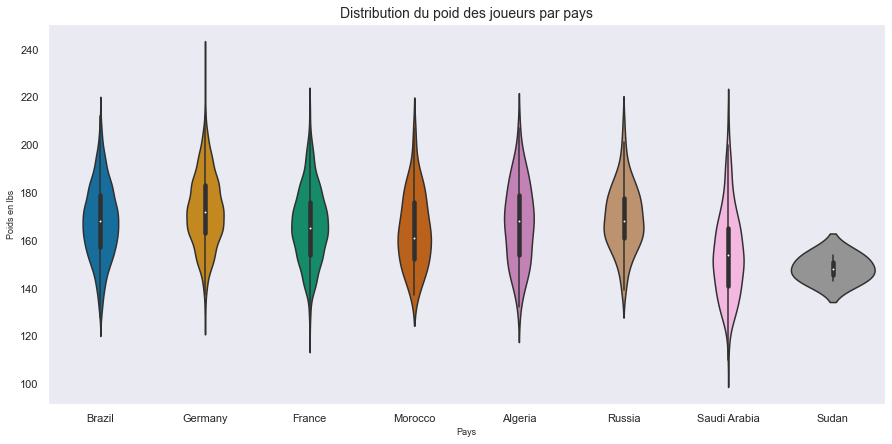

In [189]:
# supprimer le suffixe lbs
df.Weight = df.Weight.str.replace('lbs', '')

# choisir quelques pays
pays = ['Morocco', 'Germany', 'Sudan', 'France', 'Algeria', 'Brazil', 'Saudi Arabia', 'Russia']
data_pays = df.loc[df['Nationality'].isin(pays) & df['Weight']]

# convertir la colonne Weight en float 
data_pays["Weight"] = data_pays["Weight"].astype('float')

# violin plot
plt.rcParams['figure.figsize'] = (15, 7)
#ax = sns.violinplot(x=data_pays['Nationality'], y = data_pays['Weight'], palette = 'Reds')
ax = sns.violinplot(data=data_pays, x='Nationality', y='Weight')
ax.set_xlabel(xlabel = 'Pays', fontsize = 9)
ax.set_ylabel(ylabel = 'Poids en lbs', fontsize = 9)
ax.set_title(label = 'Distribution du poid des joueurs par pays', fontsize = 14)
plt.savefig('RES/poids_joueurs_pays.png', dpi = 199)
plt.show()

On observe une variabilité différente du poids des joueurs selon la nationalité